In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
time_ser = pd.read_feather('../data/processed/icu_timeseries_features_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')

In [30]:
tab_fea =  pd.read_feather('../data/processed/icu_tabular_features_0M_0ed859c799267d4ae737f8814d52726d_20240512.feather')

In [31]:
time_ser['GCS Score'] = time_ser['GCS - Eye Opening'] + time_ser['GCS - Motor Response'] + time_ser['GCS - Verbal Response']


In [32]:
heart_rate_GCS = time_ser.loc[:,['abs_event_time','stay_id','Heart Rate','GCS Score']]

In [33]:
grouped_data = tab_fea.groupby('subject_id')['stay_id'].apply(list).reset_index()


In [34]:
# Create a dictionary mapping 'stay_id' to 'subject_id'
stay_id_to_subject_id = dict(zip(grouped_data['stay_id'].explode(), grouped_data['subject_id'].repeat(grouped_data['stay_id'].apply(len))))

# Map 'stay_id' in heart_rate DataFrame to 'subject_id'
heart_rate_GCS['subject_id'] = heart_rate_GCS['stay_id'].map(stay_id_to_subject_id)

In [35]:
heart_rate_GCS.fillna(method='ffill', inplace=True)

/var/folders/nt/yrb0gq390jj6nshk14mryrpc0000gn/T/ipykernel_28609/4164713749.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  heart_rate_GCS.fillna(method='ffill', inplace=True)


In [36]:
heart_rate_GCS.fillna(method='bfill', inplace=True)

/var/folders/nt/yrb0gq390jj6nshk14mryrpc0000gn/T/ipykernel_28609/2994009171.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  heart_rate_GCS.fillna(method='bfill', inplace=True)


In [37]:
heart_rate_GCS['abs_event_time'] = pd.to_datetime(heart_rate_GCS['abs_event_time'])

In [38]:
filtered_df = heart_rate_GCS[heart_rate_GCS['stay_id'] == 	38554095 ]

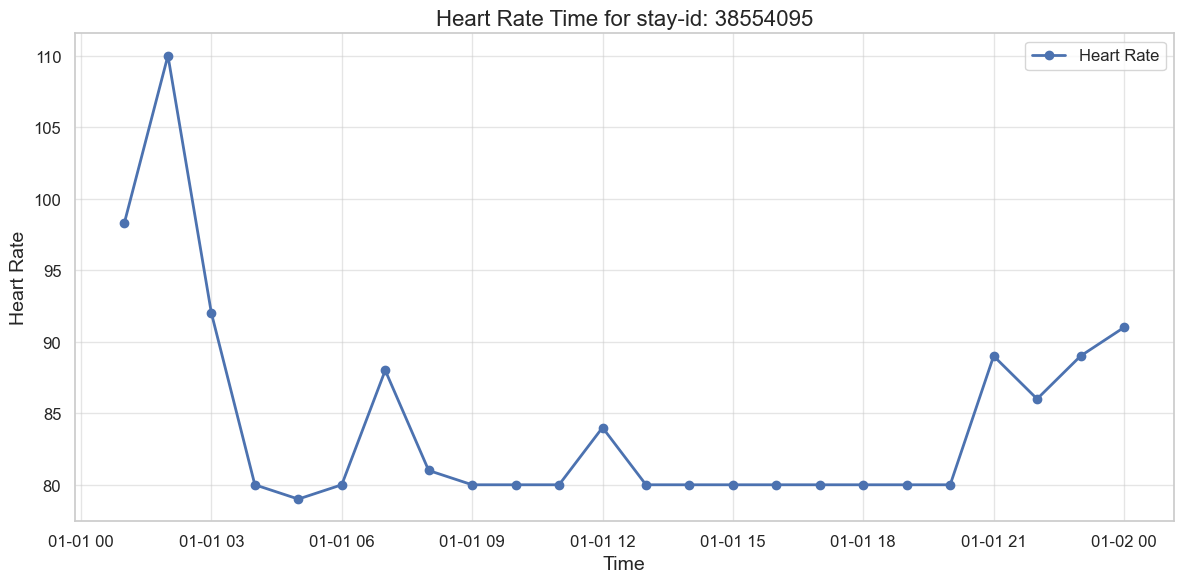

In [39]:
sns.set_theme(style="whitegrid")

# Plot the time series graph for heart rate
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['abs_event_time'], filtered_df['Heart Rate'], marker='o', linestyle='-', color='b', linewidth=2, markersize=6, label='Heart Rate')
plt.title(f'Heart Rate Time for stay-id: 38554095', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Heart Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

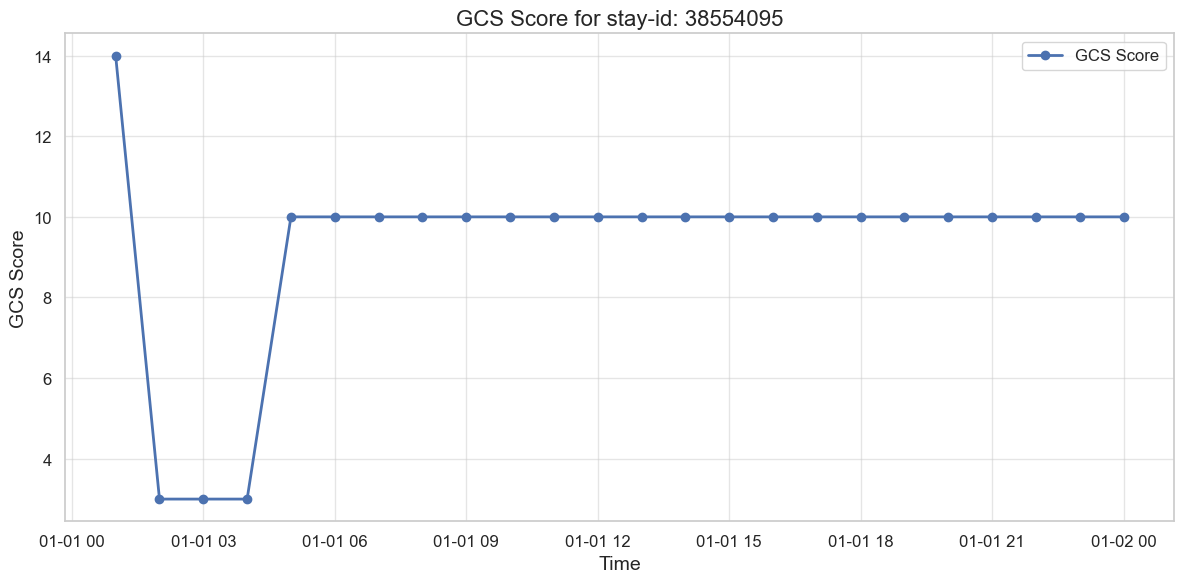

In [40]:
sns.set_theme(style="whitegrid")

# Plot the time series graph for heart rate
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['abs_event_time'], filtered_df['GCS Score'], marker='o', linestyle='-', color='b', linewidth=2, markersize=6, label='GCS Score')
plt.title(f'GCS Score for stay-id: 38554095', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('GCS Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()